In [1]:
import pandas as pd 
pingees = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
pingees

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Question 1
Link to ChatBot session: https://chatgpt.com/share/66f6155e-db80-8005-9b84-26ab6a09c78d

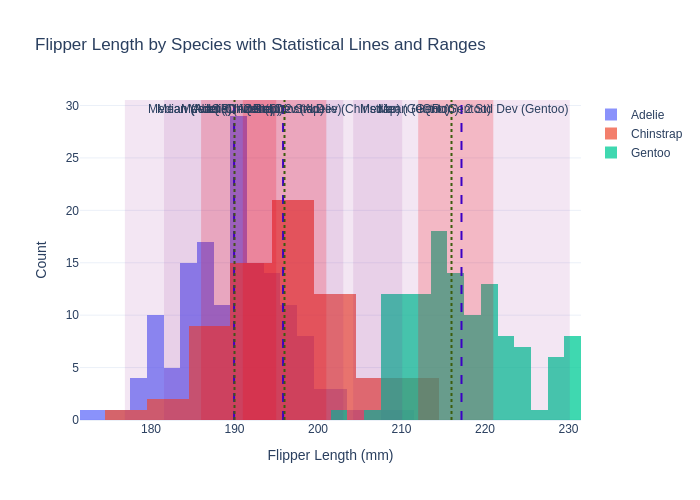

In [21]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing values for flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

# Function to add statistical lines and ranges to the plot
def add_stat_lines(fig, species, data):
    mean = data.mean()
    median = data.median()
    std = data.std()
    iqr = data.quantile(0.75) - data.quantile(0.25)
    
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    lower_iqr = data.quantile(0.25)
    upper_iqr = data.quantile(0.75)

    # Add mean and median lines
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text=f"Mean ({species})", annotation_position="top left")
    fig.add_vline(x=median, line=dict(color='green', dash='dot'), annotation_text=f"Median ({species})", annotation_position="top left")

    # Add range rectangles (IQR and 2*std range)
    fig.add_vrect(x0=lower_iqr, x1=upper_iqr, fillcolor="red", opacity=0.2, line_width=0, annotation_text=f"IQR ({species})")
    fig.add_vrect(x0=lower_bound, x1=upper_bound, fillcolor="purple", opacity=0.1, line_width=0, annotation_text=f"2 Std Dev ({species})")

# Create a Plotly figure for each species
fig = go.Figure()

species_list = penguins['species'].unique()

for species in species_list:
    species_data = penguins[penguins['species'] == species]
    flipper_lengths = species_data['flipper_length_mm']
    
    # Add histogram for species
    fig.add_trace(go.Histogram(x=flipper_lengths, name=f"{species}", opacity=0.75))
    
    # Add statistical lines and rectangles
    add_stat_lines(fig, species, flipper_lengths)

# Update layout for the figure
fig.update_layout(
    title="Flipper Length by Species with Statistical Lines and Ranges",
    barmode='overlay',
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    template="plotly_white"
)

# Show the figure
fig.show(renderer="png")


## Question 2
Link to ChatBot session: https://chatgpt.com/share/66f6155e-db80-8005-9b84-26ab6a09c78d

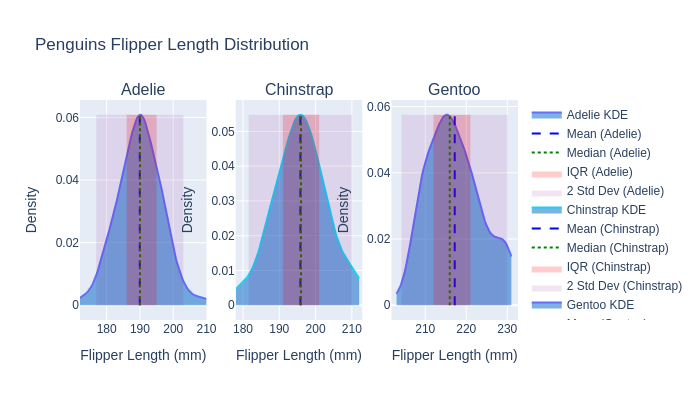

In [28]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Remove rows with missing values for flipper_length_mm
penguins = penguins.dropna(subset=['flipper_length_mm'])

def plot_kde_with_stats(species, data, fig, index):
    # Calculate statistics
    mean = data.mean()
    median = data.median()
    std = data.std()
    iqr_lower = data.quantile(0.25)
    iqr_upper = data.quantile(0.75)
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    
    # Create KDE using gaussian_kde from scipy
    kde = gaussian_kde(data)
    kde_data = np.linspace(data.min(), data.max(), 100)
    kde_values = kde(kde_data)

    # Add KDE line to figure
    fig.add_trace(go.Scatter(
        x=kde_data,
        y=kde_values,
        mode='lines',
        name=f'{species} KDE',
        fill='tozeroy',
        fillcolor='rgba(0, 100, 200, 0.5)',
        line=dict(width=2)
    ), row=1, col=index)
    
    # Add mean line
    fig.add_trace(go.Scatter(
        x=[mean, mean],
        y=[0, max(kde_values)],
        mode='lines',
        name=f'Mean ({species})',
        line=dict(color='blue', dash='dash')
    ), row=1, col=index)
    
    # Add median line
    fig.add_trace(go.Scatter(
        x=[median, median],
        y=[0, max(kde_values)],
        mode='lines',
        name=f'Median ({species})',
        line=dict(color='green', dash='dot')
    ), row=1, col=index)
    
    # Add shaded IQR
    fig.add_trace(go.Scatter(
        x=[iqr_lower, iqr_lower, iqr_upper, iqr_upper],
        y=[0, max(kde_values), max(kde_values), 0],
        fill='toself',
        fillcolor='rgba(255, 0, 0, 0.2)',
        line=dict(color='rgba(255, 0, 0, 0)'),
        name=f'IQR ({species})'
    ), row=1, col=index)
    
    # Add shaded area within 2 std devs
    fig.add_trace(go.Scatter(
        x=[lower_bound, lower_bound, upper_bound, upper_bound],
        y=[0, max(kde_values), max(kde_values), 0],
        fill='toself',
        fillcolor='rgba(128, 0, 128, 0.1)',
        line=dict(color='rgba(128, 0, 128, 0)'),
        name=f'2 Std Dev ({species})'
    ), row=1, col=index)

# Create a figure with subplots (one for each species)
species_list = penguins['species'].unique()
fig = make_subplots(rows=1, cols=3, subplot_titles=species_list)

for i, species in enumerate(species_list):
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    plot_kde_with_stats(species, species_data, fig, i + 1)

# Update layout
fig.update_layout(title_text='Penguins Flipper Length Distribution', height=400)
fig.update_xaxes(title_text='Flipper Length (mm)')
fig.update_yaxes(title_text='Density')

# Show the plot
fig.show(renderer="png")


## Question 3

Link to ChatBot session: https://chatgpt.com/share/66f6155e-db80-8005-9b84-26ab6a09c78d
### Box Plots
A box plot displays the five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It also highlights potential outliers.
#### Pros:
Great for identifying the spread and skewness of data.
Clearly shows quartiles and outliers.
Compact representation, ideal for comparing distributions across groups.
#### Cons:
Does not show detailed distribution or modality (e.g., multiple peaks).
Cannot depict the exact distribution shape within quartiles.

### Histograms
A histogram divides data into bins and represents the frequency of data within each bin.
#### Pros:
Easy to understand, especially for large datasets.
Good for visualizing the shape of a distribution, such as modality (uni- or multi-modal).
Shows gaps and clusters effectively.
#### Cons:
Bin size selection can heavily influence the interpretation of data. Too large or small bins can obscure insights.
Doesn't show specific statistical summary metrics, like median or quartiles, without additional markings.

### Kernel Density Estimators (KDE)
A KDE plot smooths the data using a continuous probability density function. Unlike histograms, KDE plots do not rely on bins, instead using bandwidth to control smoothness.
#### Pros:
Provides a smooth, continuous estimate of the distribution, often revealing more detail than a histogram.
Allows for better visualization of data trends, such as multiple peaks or skewness.
Smoothing removes noise, making it easier to see the distribution shape.
#### Cons:
Over-smoothing or under-smoothing can misrepresent the data (bandwidth selection is crucial).
Less intuitive than histograms for some users.
Does not show individual data points or outliers explicitly.

### Personal Preference: 
I prefer **Kernel Density Estimators (KDE)** because they offer a smooth, detailed view of the data distribution without the limitations of binning in histograms. KDEs make it easier to spot patterns and subtle features like multiple peaks. They're more flexible and provide better insights into the shape of the data compared to histograms or box plots. Histograms are great for simplicity, and box plots are useful for summarizing key statistics like median and outliers, but KDE offers the best overall balance for exploring distribution shapes.

## Question 4

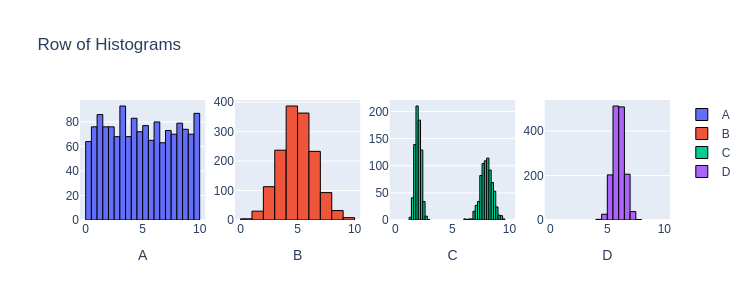

In [20]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

### Similar means and similar variances:

#### Datasets B and D: 
Both of these datasets are generated from normal distributions with means around 5 and 6, and standard deviations of 1.5 and 0.5, respectively. While their means differ slightly, the spreads are quite similar, and their variances are relatively close.
Similar means but quite different variances:

#### Datasets B and C: 
Dataset B has a normal distribution with a mean of 5 and a standard deviation of 1.5. Dataset C combines two normal distributions with means of 2 and 8, but one of these components (the part with a mean of 8) overlaps significantly with dataset B in terms of its mean. However, dataset C has a much larger variance because it's a bimodal distribution, creating a wider spread.
Similar variances but quite different means:

#### Datasets B and D: 
Both datasets have normal distributions, and their variances (based on the standard deviations of 1.5 for B and 0.5 for D) are somewhat comparable. However, their means are different, with dataset B centered around 5 and dataset D centered around 6.
Quite different means and quite different variances:

#### Datasets A and C:
Dataset A is a uniform distribution between 0 and 10, which results in a very different mean and spread compared to dataset C, which is bimodal with peaks around 2 and 8. The variance in C is also larger due to the two peaks and the spread in its data.

Link to ChatBot session: https://chatgpt.com/share/66f61e1b-1ae4-8005-9c30-926ae13ce383

## Question 5

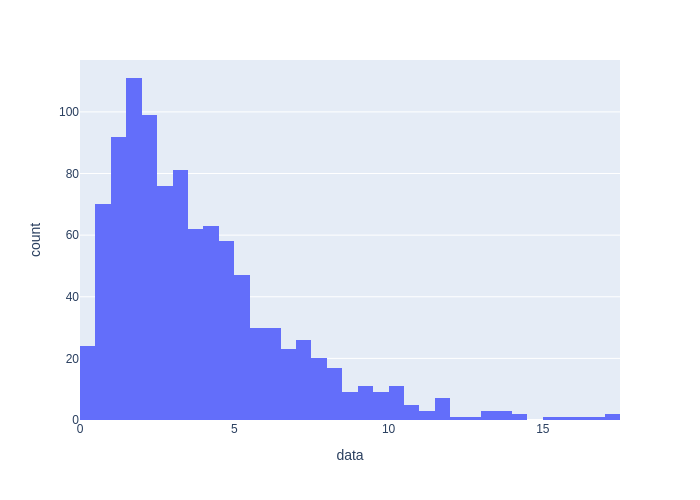

In [4]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig1.show(renderer="png")

   Link to ChatBot session: https://chatgpt.com/share/66f61e1b-1ae4-8005-9c30-926ae13ce383
   
   
   In a right-skewed distribution, the mean is greater than the median because the long right 
    tail pulls the mean toward higher values. In contrast, in a left-skewed distribution, the mean 
    is less than the median because the left tail pulls the mean toward lower values.
    This difference occurs because the mean is affected by all values, including outliers in the tail,
    while the median is only influenced by the position of values, not their magnitude. Therefore, in 
    a right-skewed distribution, large values in the tail pull the mean to the right of the median, 
    and in a left-skewed distribution, small values in the tail pull the mean to the left of the median.

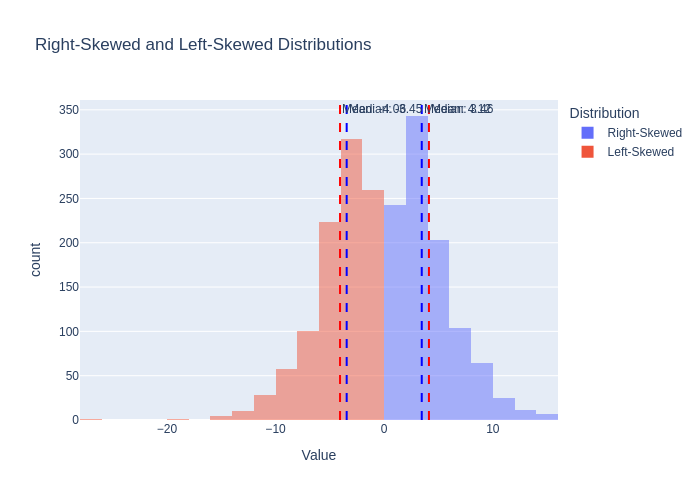

In [16]:
# Link to ChatBot session: https://chatgpt.com/share/66f61e1b-1ae4-8005-9c30-926ae13ce383
import numpy as np
import scipy.stats as stats
import plotly.express as px

# Set random seed for reproducibility
np.random.seed(42)

# Generate a right-skewed distribution (Gamma distribution)
sample1 = np.random.gamma(shape=2, scale=2, size=1000)  # Right-skewed
mean1 = np.mean(sample1)
median1 = np.median(sample1)

# Generate a left-skewed distribution (flipped gamma distribution)
sample2 = -np.random.gamma(shape=2, scale=2, size=1000)  # Left-skewed
mean2 = np.mean(sample2)
median2 = np.median(sample2)

# Create a combined dataset for plotting
combined_samples = np.concatenate([sample1, sample2])
labels = ['Right-Skewed'] * len(sample1) + ['Left-Skewed'] * len(sample2)

# Plotting
fig = px.histogram(
    x=combined_samples,
    color=labels,
    barmode='overlay',
    title='Right-Skewed and Left-Skewed Distributions',
    labels={'x': 'Value', 'color': 'Distribution'},
    nbins=30
)

# Add lines for mean and median
for sample, mean, median, label in zip([sample1, sample2], [mean1, mean2], [median1, median2], ['Right-Skewed', 'Left-Skewed']):
    fig.add_vline(x=mean, line_dash="dash", line_color="red", annotation_text="Mean: {:.2f}".format(mean), annotation_position="top right")
    fig.add_vline(x=median, line_dash="dash", line_color="blue", annotation_text="Median: {:.2f}".format(median), annotation_position="top right")

# Show the figure
fig.show(renderer="png")



## Question 6


In [8]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv")
df # df.columns

,Item_Number,Name,Year,Theme,Subtheme,Pieces,Minifigures,Image_URL,GBP_MSRP,USD_MSRP,CAD_MSRP,EUR_MSRP,Packaging,Availability
0,10246,Detective's Office,2015,Advanced Models,Modular Buildings,2262.0,6.0,http://images.brickset.com/sets/images/10246-1...,132.99,159.99,199.99,149.99,Box,Retail - limited
1,10247,Ferris Wheel,2015,Advanced Models,Fairground,2464.0,10.0,http://images.brickset.com/sets/images/10247-1...,149.99,199.99,229.99,179.99,Box,Retail - limited
2,10248,Ferrari F40,2015,Advanced Models,Vehicles,1158.0,NaN,http://images.brickset.com/sets/images/10248-1...,69.99,99.99,119.99,89.99,Box,LEGO exclusive
3,10249,Toy Shop,2015,Advanced Models,Winter Village,898.0,NaN,http://images.brickset.com/sets/images/10249-1...,59.99,79.99,NaN,69.99,Box,LEGO exclusive
4,10581,Ducks,2015,Duplo,Forest Animals,13.0,1.0,http://images.brickset.com/sets/images/10581-1...,9.99,9.99,12.99,9.99,Box,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,647,Lorry With Girders,1971,LEGOLAND,Vehicle,52.0,NaN,http://images.brickset.com/sets/images/647-1.jpg,0.55,NaN,NaN,NaN,Box,Retail
6168,648,Service Station,1971,LEGOLAND,Building,55.0,NaN,http://images.brickset.com/sets/images/648-1.jpg,0.55,NaN,NaN,NaN,Box,Retail
6169,795,"2 Large Baseplates, Red/Blue",1971,Basic,Supplementaries,2.0,NaN,http://images.brickset.com/sets/images/795-1.jpg,NaN,2.10,NaN,NaN,Not specified,Not specified
6170,796,"2 Large Baseplates, Green/Yellow",1971,Basic,Supplementaries,2.0,NaN,http://images.brickset.com/sets/images/796-1.jpg,NaN,2.10,NaN,NaN,Not specified,Not specified


First few rows of the dataset:
  Item_Number                Name  Year            Theme           Subtheme  \
0       10246  Detective's Office  2015  Advanced Models  Modular Buildings   
1       10247        Ferris Wheel  2015  Advanced Models         Fairground   
2       10248         Ferrari F40  2015  Advanced Models           Vehicles   
3       10249            Toy Shop  2015  Advanced Models     Winter Village   
4       10581               Ducks  2015            Duplo     Forest Animals   

   Pieces  Minifigures                                          Image_URL  \
0  2262.0          6.0  http://images.brickset.com/sets/images/10246-1...   
1  2464.0         10.0  http://images.brickset.com/sets/images/10247-1...   
2  1158.0          NaN  http://images.brickset.com/sets/images/10248-1...   
3   898.0          NaN  http://images.brickset.com/sets/images/10249-1...   
4    13.0          1.0  http://images.brickset.com/sets/images/10581-1...   

   GBP_MSRP  USD_MSRP  CAD_MSRP

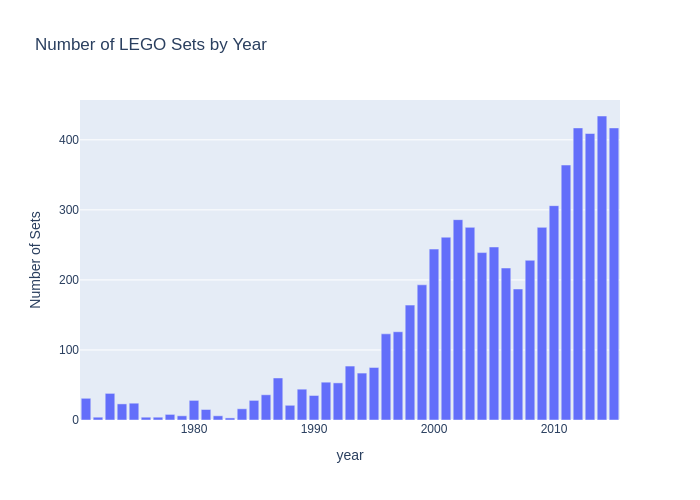

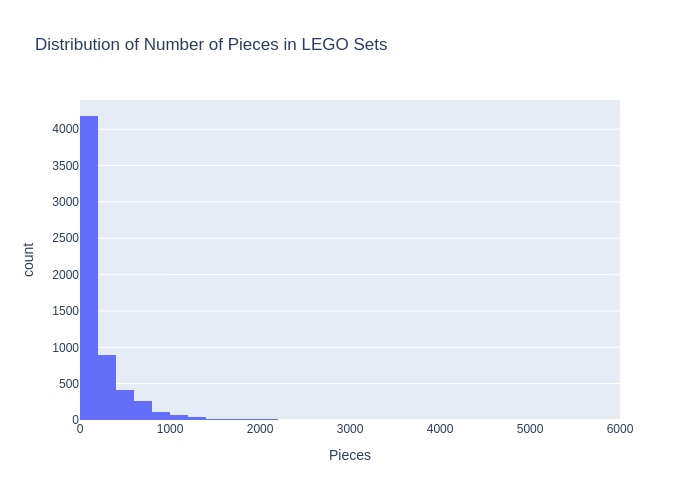

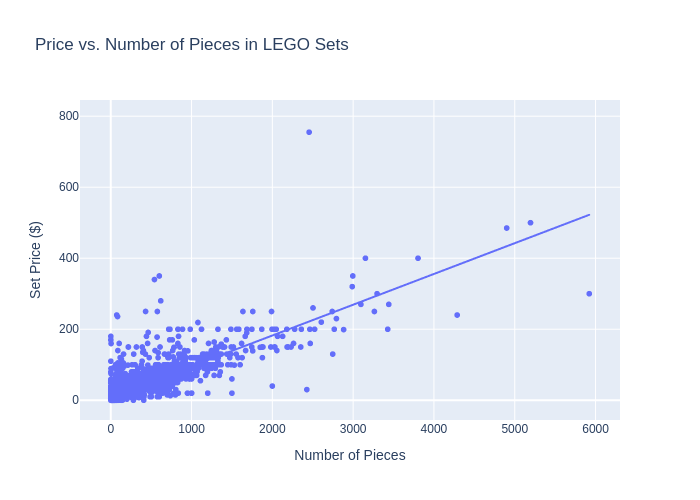

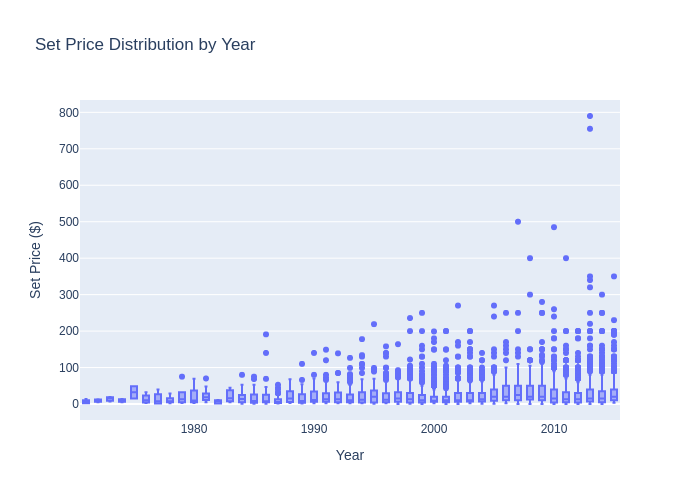

Summary Statistics:
       Item_Number                  Name         Year  Theme       Subtheme  \
count         6172                  6172  6172.000000   6172           3966   
unique        5854                  5519          NaN    115            357   
top           8805  City Advent Calendar          NaN  Duplo  Episode IV-VI   
freq            19                    11          NaN    471             83   
mean           NaN                   NaN  2004.712087    NaN            NaN   
std            NaN                   NaN     8.914686    NaN            NaN   
min            NaN                   NaN  1971.000000    NaN            NaN   
25%            NaN                   NaN  2000.000000    NaN            NaN   
50%            NaN                   NaN  2006.000000    NaN            NaN   
75%            NaN                   NaN  2012.000000    NaN            NaN   
max            NaN                   NaN  2015.000000    NaN            NaN   

             Pieces  Minifigure

In [27]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/seankross/lego/master/data-tidy/legosets.csv"
lego_data = pd.read_csv(url)

# Display the first few rows and the columns of the dataset
print("First few rows of the dataset:")
print(lego_data.head())
print("\nColumn names in the dataset:")
print(lego_data.columns)

# Summary statistics
summary_stats = lego_data.describe(include='all')
print("\nSummary Statistics:")
print(summary_stats)

# Count of LEGO sets by year
sets_by_year = lego_data['Year'].value_counts().reset_index()
sets_by_year.columns = ['year', 'count']

# Plotting LEGO sets by year
fig1 = px.bar(sets_by_year, x='year', y='count', title='Number of LEGO Sets by Year', labels={'count': 'Number of Sets'})
fig1.show(renderer="png")

# Distribution of number of pieces
fig2 = px.histogram(lego_data, x='Pieces', nbins=30, title='Distribution of Number of Pieces in LEGO Sets')
fig2.show(renderer="png")

# Scatter plot: Price vs. Number of Pieces
fig3 = px.scatter(lego_data, x='Pieces', y='USD_MSRP', title='Price vs. Number of Pieces in LEGO Sets',
                  labels={'Pieces': 'Number of Pieces', 'USD_MSRP': 'Set Price ($)'}, 
                  trendline='ols')
fig3.show(renderer="png")

# Box plot for Price distribution by year
fig4 = px.box(lego_data, x='Year', y='USD_MSRP', title='Set Price Distribution by Year', 
               labels={'USD_MSRP': 'Set Price ($)', 'Year': 'Year'})
fig4.show(renderer="png")

# Displaying summary statistics
print("Summary Statistics:")
print(summary_stats)


## Question 7
Link to ChatBot session: https://chatgpt.com/share/66f62b08-e748-8005-8319-40dcdfa701af

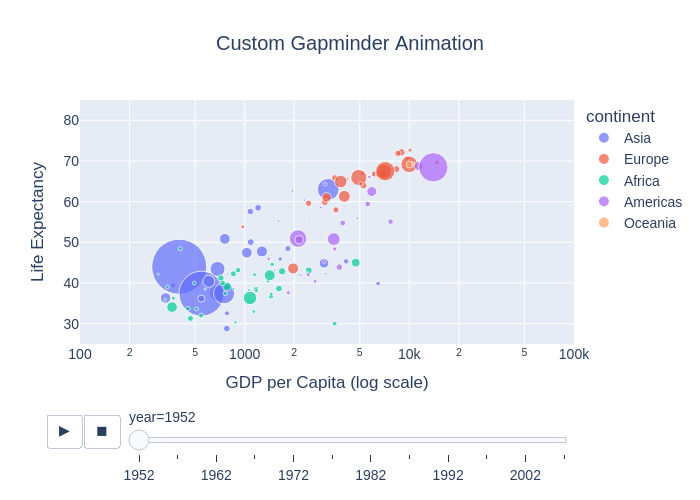

In [18]:
import plotly.express as px

# Load the Gapminder dataset
df = px.data.gapminder()

# Create the animated scatter plot
fig = px.scatter(
    df,
    x='gdpPercap', 
    y='lifeExp', 
    animation_frame='year', 
    animation_group='country', 
    size='pop', 
    color='continent',
    hover_name='country',
    log_x=True,
    size_max=60,
    range_x=[100, 100000],
    range_y=[25, 85],
    title='Gapminder: Life Expectancy vs GDP per Capita',
)

# Customize the layout
fig.update_layout(
    title='Custom Gapminder Animation',
    title_x=0.5,
    xaxis_title='GDP per Capita (log scale)',
    yaxis_title='Life Expectancy',
    font=dict(size=14),
)

# Show the plot
fig.show(renderer="png")


## Question 8
Link to ChatBot session: https://chatgpt.com/share/66f62b08-e748-8005-8319-40dcdfa701af

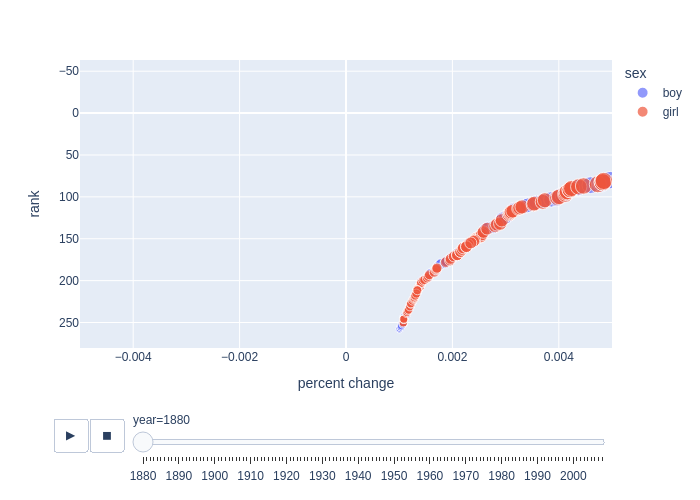

In [26]:
import pandas as pd
import plotly.express as px

# Load the baby names dataset
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

# Make identical boy and girl names distinct
bn['name'] = bn['name'] + " " + bn['sex']

# Calculate the rank of names based on percent within each year
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)

# Calculate the percent change in name prevalence from the last year
bn['percent change'] = bn['percent'].diff()
new_name = [True] + list(bn.name[:-1].values != bn.name[1:].values)
bn.loc[new_name, 'percent change'] = bn.loc[new_name, 'percent']

# Sort by year and restrict to "common" names
bn = bn.sort_values('year')
bn = bn[bn.percent > 0.001]  # Only keep names with percent > 0.001

# Create the modified scatter plot
fig = px.scatter(
    bn,
    x='percent change',      # Percent change on x-axis
    y='rank',                # Rank on y-axis
    animation_frame='year',  # Year as animation frame
    animation_group='name',  # Group by name for animation
    size='percent',          # Size based on percent
    color='sex',             # Color by sex
    hover_name='name',       # Hover name to show name
    size_max=50,             # Maximum size for points
    range_x=[-0.005, 0.005]  # Range for x-axis
)

# Reverse y-axis so rank 1 is at the top
fig.update_yaxes(autorange='reversed')

# Show the plot with PNG renderer
fig.show(renderer="png")


## Question 9
Yes